# Project 6 - Boat & Yacht Sales

#### 01. Importing Visualization Libraries and Data
#### 02. Correlations
#### 03. Scatterplots
#### 04. Pair Plot
#### 05. Categorical Plot
#### 06. Questions
#### 07. Hypotheses

# 01. Importing Visualization Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn
import bokeh
import plotly

In [3]:
# create a path
path = r'C:\Users\niels\Documents\Sales Boat\Data Source'

In [58]:
# load data
df = pd.read_csv(os.path.join(path,'boat_data_cleaned_V2.csv'), index_col = False)

In [59]:
df

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,EUR_price,Country,City,Number of views last 7 days
0,Center console boat,Terhi power boats,new boat from stock,2020.0,4.00,1.50,Thermoplastic,3490.0,Germany,BÃ¶nningstedt,75
1,Fishing Boat,Linder power boats,new boat from stock,2019.0,3.55,1.46,Aluminium,3399.0,Germany,Bayern,58
2,Sport Boat,GS Nautica power boats,Used boat,2004.0,4.70,2.00,GRP,3500.0,Italy,Lake Garda,69
3,Runabout,Kimple power boats,new boat from stock,2020.0,4.40,1.65,Aluminium,4554.0,Switzerland,Zugersee,113
4,Fishing Boat,Linder power boats,new boat from stock,2019.0,3.55,1.46,Aluminium,3999.0,Germany,Bayern,69
...,...,...,...,...,...,...,...,...,...,...,...
977,Motor Yacht,Cranchi power boats,Used boat,1981.0,5.75,2.27,GRP,6732.0,Switzerland,Luganersee,489
978,Fishing Boat,Atlantis power boats,Used boat,2020.0,4.90,1.70,Aluminium,5950.0,Germany,Mecklenburg-Vorpommern,135
979,Sport Boat,BlueCraft power boats,new boat from stock,2020.0,5.10,2.16,GRP,4799.0,Germany,Wesel,203
980,Cabin Boat,Princess power boats,Used boat,1974.0,7.20,2.70,GRP,4950.0,Switzerland,Rhein,1299


# 02. Correlations

In [119]:
# Create a correlation matrix using pandas
corr = df.corr()
corr

,Year Built,Length,Width,EUR_price,Number of views last 7 days
Year Built,1.000000,-0.223237,-0.234541,0.111476,-0.023281
Length,-0.223237,1.000000,0.928791,0.652416,-0.226892
Width,-0.234541,0.928791,1.000000,0.579814,-0.254230
EUR_price,0.111476,0.652416,0.579814,1.000000,-0.060118
Number of views last 7 days,-0.023281,-0.226892,-0.254230,-0.060118,1.000000


<AxesSubplot:>

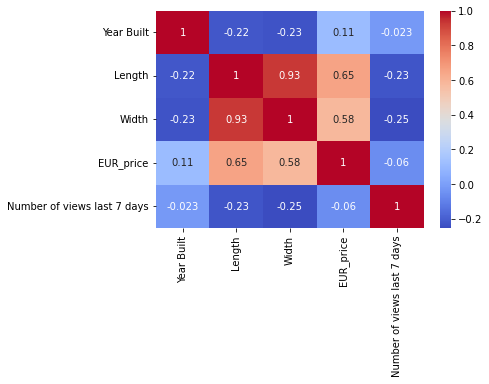

In [120]:
# Create a correlation heatmap using seaborn
seaborn.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True,
        cmap="coolwarm")

#### The strongest positive correlation exists between the variables 'length' and 'width'. This makes sense as a they are what makes the boat type. Another strong positive correlation exists between 'length' and 'EUR_price' indicating the price varies from the size.

#### The strongest negative relationship exists between 'width' and 'Number of views last 7 days'. There is also a negative relationship between 'length' and 'Number of views last 7 days' in the same logic.

# 03. Scatterplots

# Strong relationship between Length and EUR_Price but not linear

<AxesSubplot:xlabel='Length', ylabel='EUR_price'>

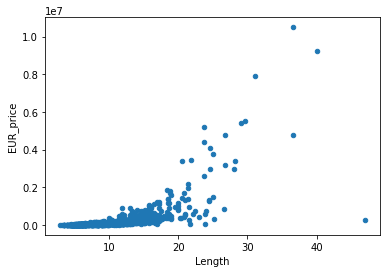

In [35]:
df.plot.scatter(x="Length", y="EUR_price")

# Very strong relationship between Length and Width and linear too

<AxesSubplot:xlabel='Length', ylabel='Width'>

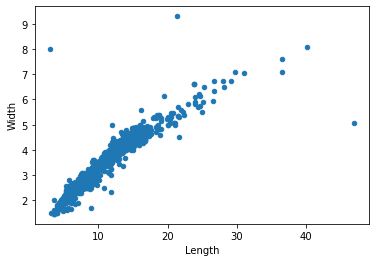

In [36]:
df.plot.scatter(x="Length", y="Width")

# 04. Pair Plot

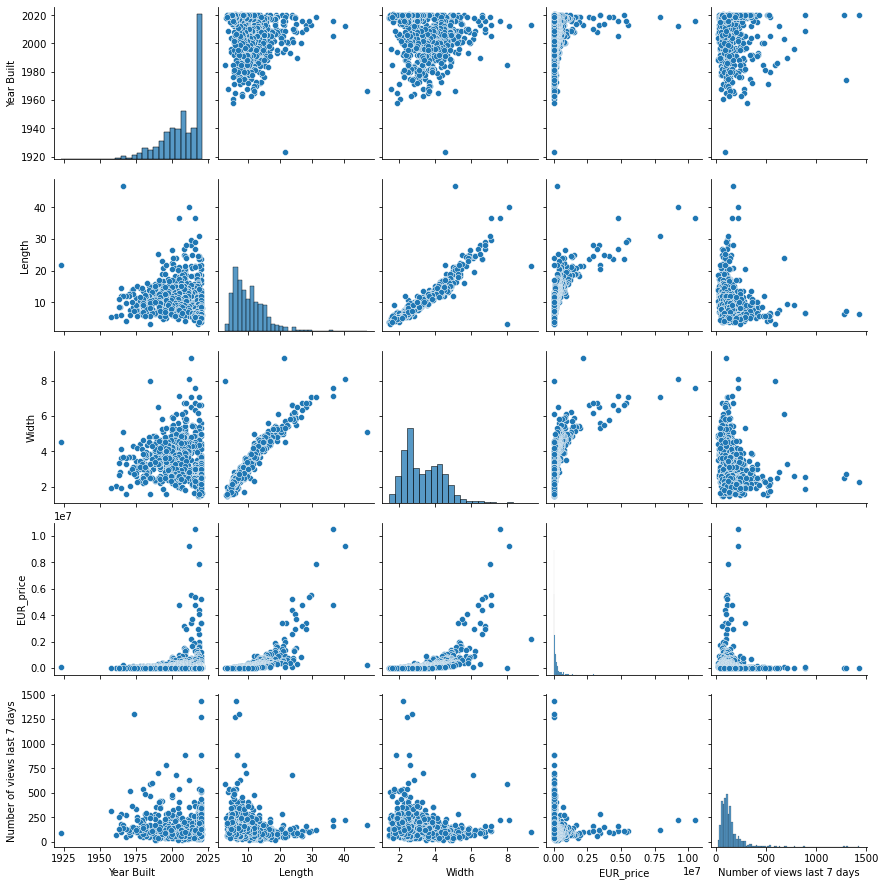

In [40]:
seaborn.pairplot(df)

## We can see that most of the boats are recents
## Most of the boats are small in Length and Width
## Most of the boats are entry level

# 05. Categorical Plot

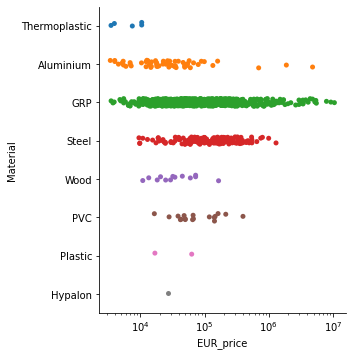

In [114]:
fig = seaborn.catplot(data=df, x="EUR_price", y="Material")
fig.ax.set_xscale("log")

<AxesSubplot:xlabel='Type', ylabel='Count'>

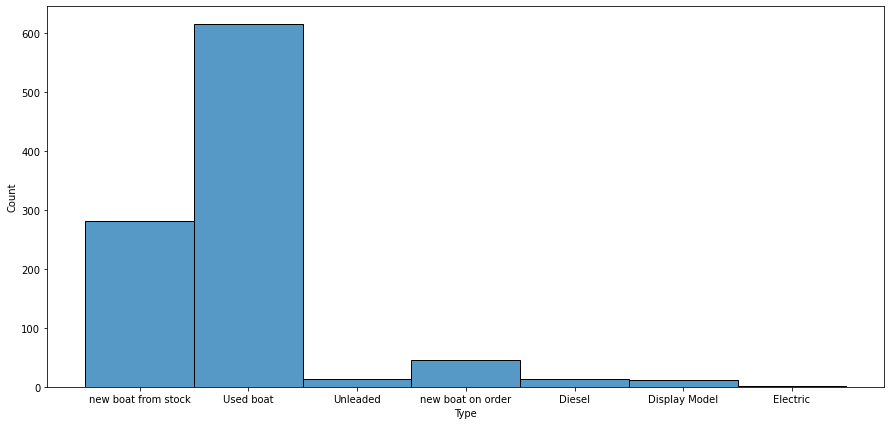

In [80]:
plt.figure(figsize=(15, 7))
seaborn.histplot(data=df, x="Type")

<AxesSubplot:xlabel='Year Built', ylabel='Count'>

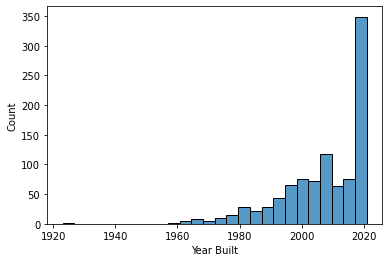

In [89]:
seaborn.histplot(data=df, x="Year Built")

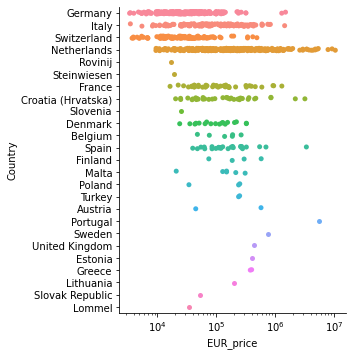

In [115]:
fig = seaborn.catplot(data=df, x="EUR_price", y="Country")
fig.ax.set_xscale("log")

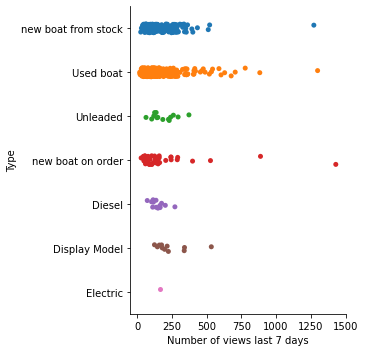

In [116]:
fig = seaborn.catplot(data=df, y="Type", x="Number of views last 7 days")

Boat Type
Catamaran                 96
Passenger boat           170
Offshore Boat            476
House Boat               483
Launch                   763
Mega Yacht               824
Working Boat            1351
Classic                 1728
Wakeboard/Wakesurf      1768
Hardtop                 2860
Pontoon Boat            2916
Runabout                3713
Deck Boat               4864
Bowrider                5588
Center console boat     5712
Pilothouse              8418
Flybridge               8423
Fishing Boat            8829
Cabin Boat             12504
Trawler                13608
Sport Boat             22455
Motor Yacht            31467
Name: Number of views last 7 days, dtype: int64

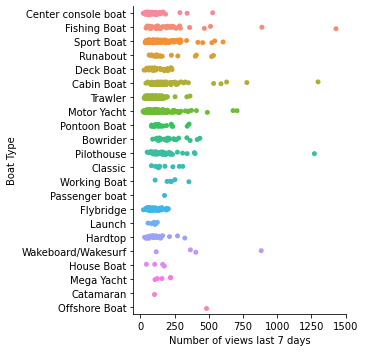

In [117]:
fig = seaborn.catplot(data=df, y="Boat Type", x="Number of views last 7 days")
df.groupby("Boat Type")["Number of views last 7 days"].sum().sort_values()

# 06. Questions

#### Question: What is the price of the most views boat and yacht?
#### Question: Are there common features between them?
#### Question: Where are they located?
#### Question: What are the specific details of the top view boats and yachts the last 7 days.
 

#### Insight: Based on the correlation heatmap and other charts, we can state that the majority of boats are ''used boats'' from 2020 located in Germany, Italy and Switzerland. It appears that most views boats these last 7 days are for ''Motor Yacht'' and also ''Sport Boats''. It would be interesting to focus more now on location, price, and boat type variables.

#### New questions to consider: What boat type are currently the most trendy ? What are the locations of used boats ?

# 07. Hypotheses

#### If a boat has a certain boat type, then it will be more likely to interest potential customers.

#### If a boat is new on stock, then prospect or customer will be interested to get more information on it.